## Ridge regression

In [1]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#### 1. Khai báo 1 số hàm trực quang 

In [2]:
def scatter_plot_act_pred(x, y_act, y_pred, title="", xlabel="", ylabel=""):
  plt.figure(figsize=(13, 6))
  plt.scatter(x, y_act, c='r', marker='o', label="Actual values")
  plt.scatter(x, y_pred, c='b', marker='s', label="Predicted values")
  x_min = np.min(x)
  x_max = np.max(x)
  y_min = np.min(y_act)
  y_max = np.max(y_act)
  # mean value
  ybar = np.mean(y_act)
  plt.axis([x_min*0.95, x_max*1.05, y_min*0.95, y_max*1.05])
  plt.xlabel(xlabel, fontsize=16)
  plt.ylabel(ylabel, fontsize=16)
  plt.legend(fontsize=15)
  plt.title(title, fontsize=20)
  plt.show()
def _plot_time_series(y_act, y_pred, dates, title="", xlabel="Time", ylabel="Value"):
    # Tạo một dãy thời gian từ 0 đến độ dài của chuỗi dữ liệu
    time_index = np.arange(len(y_act))

    plt.figure(figsize=(13, 6))
    plt.plot(dates, y_act, 'r-o', label="Actual Value")
    plt.plot(dates, y_pred, '--', label="Predicted Value")

    y_min = min(np.min(y_act), np.min(y_pred))
    y_max = max(np.max(y_act), np.max(y_pred))
    ybar = np.mean(y_act)
    plt.axis([dates[0], dates[-1], y_min*0.95, y_max*1.05])

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.legend(fontsize=16)
    plt.title(title, fontsize=20)
    plt.xticks(dates[::10], fontsize=16, rotation=45)  # Xoay ngày để tránh chồng chéo
    plt.tight_layout()  # Đảm bảo không bị cắt bớt nhãn
    plt.show()

#### 2. Chọn đặc trưng 

##### 2.1 Đọc dữ liệu

- Tập train

In [3]:
df = pd.read_csv("TransformedData.csv")
df.head()

,Date,AQI-IN,PM2.5,PM10,SO2,NO2,O3,CO,Temp,Humidity,AQI_Label
0,2021-04-08,4.787561,4.127394,4.521907,2.644121,3.333478,5.567764,23.280893,-0.354070,6.633250,1.0
1,2021-04-09,5.683591,4.941693,5.062635,2.491780,3.638278,6.244998,24.859606,-0.264799,6.244998,2.0
2,2021-04-10,5.365998,4.736275,4.969862,2.094713,3.466711,6.480741,24.331050,0.003014,6.480741,2.0
3,2021-04-11,4.997258,4.127394,4.820347,1.818446,2.893444,6.708204,16.822604,0.092285,6.855655,1.0
4,2021-04-12,4.430958,3.527224,3.951613,1.443635,2.776472,6.403124,26.832816,-0.175528,8.306624,0.0


- Tập test

In [4]:
df_test = pd.read_csv("TransformedDataTest.csv")
df_test.head()

,Date,AQI-IN,PM2.5,PM10,SO2,NO2,CO,Temp,Humidity,AQI_Label
0,2024-04-08,5.337561,2.998223,5.429365,0.881374,2.491780,10.000000,-2.039323,4.358899,2.0
1,2024-04-09,5.575963,4.897895,5.135833,2.094713,3.333478,16.822604,-2.353065,3.872983,2.0
2,2024-04-10,5.805144,5.036995,5.123999,2.491780,3.466711,19.570386,-1.725581,5.916080,2.0
3,2024-04-11,5.613141,4.912709,5.123999,1.443635,3.093102,21.610183,-0.784355,7.810250,2.0
4,2024-04-12,5.010680,4.304248,4.969862,1.443635,2.776472,20.000000,-0.156871,7.280110,1.0


##### 2.2 Biến đầu vào

- Tập train

In [5]:
x = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'Temp']]
x.head()

,PM2.5,PM10,SO2,NO2,Temp
0,4.127394,4.521907,2.644121,3.333478,-0.354070
1,4.941693,5.062635,2.491780,3.638278,-0.264799
2,4.736275,4.969862,2.094713,3.466711,0.003014
3,4.127394,4.820347,1.818446,2.893444,0.092285
4,3.527224,3.951613,1.443635,2.776472,-0.175528


- Tập test

In [6]:
x_test = df_test[['PM2.5', 'PM10', 'SO2', 'NO2', 'Temp']]
x_test.head()

,PM2.5,PM10,SO2,NO2,Temp
0,2.998223,5.429365,0.881374,2.491780,-2.039323
1,4.897895,5.135833,2.094713,3.333478,-2.353065
2,5.036995,5.123999,2.491780,3.466711,-1.725581
3,4.912709,5.123999,1.443635,3.093102,-0.784355
4,4.304248,4.969862,1.443635,2.776472,-0.156871


##### 2.3 Biến mục tiêu

- Tập train

In [7]:
y = df[['AQI-IN']]
y.head()

,AQI-IN
0,4.787561
1,5.683591
2,5.365998
3,4.997258
4,4.430958


- Tập test

In [8]:
y_test = df_test[['AQI-IN']]
y_test.head()

,AQI-IN
0,5.337561
1,5.575963
2,5.805144
3,5.613141
4,5.010680


##### 2.4 Chia thành 2 tập train và tập validation

<li>Chọn giá trị random_state cho hàm chia tập dữ liệu</li>

In [9]:
# random_states = range(1, 1000)
# mean_scores = []
# for random_state in random_states:
#     scores = []
#     for _ in range(50): 
#         X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=random_state)
#         model = Ridge(alpha=0.05)
#         model.fit(X_train, y_train)
#         score = model.score(x_test, y_test)
#         print(score)
#         scores.append(score)
#     mean_scores.append(np.mean(scores))

# best_random_state = random_states[np.argmax(mean_scores)]
# print("Best random state:", best_random_state)

<li>Chia dữ liệu</li>

In [10]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=554)
print(X_train.shape, X_validation.shape)
print(y_train.shape, y_validation.shape)

(876, 5) (220, 5)
(876, 1) (220, 1)


#### 3. Chọn hệ số Alpha

In [11]:
alpha_range = np.arange(0.05, 1, 0.05)
models = {}

def _regression(alpha, X_train, y_train, X_validation, y_validation, models: dict):
    dict_models = {}
    rid_regr = Ridge(alpha=alpha)
    rid_regr.fit(X_train, y_train)
    y_pred = rid_regr.predict(X_validation)
    MSE = np.mean((y_validation-y_pred)**2)
    dict_models["MSE"] = MSE
    dict_models["model"] = rid_regr
    model_name = "ridge_" + str(alpha)
    models[model_name] = dict_models
    return models

for alpha in alpha_range:
  models = _regression(round(alpha, 2), X_train, y_train, X_validation, y_validation, models)

# In ra model với hệ số alpha tốt nhất (MSE nhỏ nhất)
i = 0
for k, v in models.items():
  if i==0:
    best_model = k
    mse = models[k]["MSE"]
  if models[k]["MSE"] < mse:
    best_model = k
  print("model {}, MSE: {}".format(k, models[k]["MSE"]))
  i+=1

print("-----------------------------------------")
print("Best models: {}, MSE: {}".format(best_model, models[best_model]["MSE"]))


model ridge_0.05, MSE: 0.04501608667780268
model ridge_0.1, MSE: 0.04501906020901241
model ridge_0.15, MSE: 0.045022038796535505
model ridge_0.2, MSE: 0.045025022432805414
model ridge_0.25, MSE: 0.04502801111027314
model ridge_0.3, MSE: 0.04503100482140704
model ridge_0.35, MSE: 0.04503400355869269
model ridge_0.4, MSE: 0.045037007314633185
model ridge_0.45, MSE: 0.0450400160817484
model ridge_0.5, MSE: 0.04504302985257565
model ridge_0.55, MSE: 0.04504604861966911
model ridge_0.6, MSE: 0.04504907237559997
model ridge_0.65, MSE: 0.04505210111295644
model ridge_0.7, MSE: 0.045055134824343424
model ridge_0.75, MSE: 0.04505817350238282
model ridge_0.8, MSE: 0.04506121713971308
model ridge_0.85, MSE: 0.045064265728989236
model ridge_0.9, MSE: 0.04506731926288326
model ridge_0.95, MSE: 0.04507037773408333
-----------------------------------------
Best models: ridge_0.05, MSE: 0.04501608667780268


##### Vậy với Alpha 0.05 sẽ cho mô hình tối ưu nhất

#### 4. Huấn luyện mô hình

##### 4.1 Tạo một đối tượng mô hình Ridge Regression từ thư viện linear_model và huấn luyện nó với biến đầu vào và biến mục tiêu

In [12]:
ridge_regresion = Ridge(alpha=0.05)
ridge_regresion.fit(X_train, y_train)


Ridge(alpha=0.05)

##### 4.2 Dự đoán giá trị AQI-IN

<li>Dự đoán trên tập Validation</li>

In [13]:
y_predict_ridge = ridge_regresion.predict(X_validation)
y_predict_ridge

array([[4.92166556],
       [4.17548012],
       [5.09824508],
       [4.51166359],
       [5.08045361],
       [4.77528394],
       [4.77684111],
       [4.67389486],
       [4.5583966 ],
       [4.38150587],
       [4.35199028],
       [4.40286506],
       [4.83662067],
       [4.58394586],
       [5.40032339],
       [4.47495884],
       [4.92549258],
       [5.79641879],
       [4.03182695],
       [4.45993568],
       [4.62663882],
       [5.46310817],
       [4.94402769],
       [5.80420774],
       [5.80970543],
       [5.27417764],
       [4.49484709],
       [4.31326954],
       [5.11493744],
       [5.42360339],
       [4.13717301],
       [4.98483699],
       [4.34733546],
       [5.0304164 ],
       [4.6289494 ],
       [4.4205915 ],
       [4.38842671],
       [4.47998198],
       [3.92406357],
       [3.45623226],
       [4.82634087],
       [4.8757843 ],
       [4.66814506],
       [5.35073315],
       [4.44578923],
       [3.95508276],
       [4.50443596],
       [4.111

<li>Dự đoán trên tập Train</li>

In [14]:
y_predict_ridge_train = ridge_regresion.predict(X_train)
y_predict_ridge_train

array([[5.32874882],
       [4.18309868],
       [4.4416292 ],
       [4.44704533],
       [4.96121666],
       [4.19468173],
       [5.80420774],
       [4.18487221],
       [4.85816945],
       [5.60342151],
       [4.33713307],
       [4.70443864],
       [4.28872867],
       [4.26047171],
       [5.03322425],
       [3.63632308],
       [4.99826472],
       [4.22993658],
       [4.21743961],
       [5.35962991],
       [5.46433165],
       [5.0668186 ],
       [4.09988988],
       [4.71414349],
       [5.0652231 ],
       [5.4427221 ],
       [4.88460953],
       [4.170408  ],
       [4.79921823],
       [3.67505841],
       [4.39253796],
       [5.61933003],
       [5.61079738],
       [4.63019005],
       [5.72155965],
       [4.49290212],
       [5.00163349],
       [4.521059  ],
       [6.18646399],
       [4.17924544],
       [5.04264965],
       [5.75306837],
       [4.34560421],
       [4.27037435],
       [4.39871765],
       [5.27506687],
       [3.934769  ],
       [3.924

<li>Dự đoán trên tập Test</li>

In [15]:
y_predict_ridge_test = ridge_regresion.predict(x_test)
y_predict_ridge_test

array([[4.84658422],
       [5.47858023],
       [5.53908424],
       [5.5488516 ],
       [5.23894029],
       [4.73567781],
       [4.59204834],
       [5.98299955],
       [5.0297883 ],
       [4.68143187],
       [4.74651789],
       [4.89939651],
       [5.57360752],
       [5.18102342],
       [4.97882269],
       [5.005066  ],
       [4.61559965],
       [4.88290354],
       [5.06170552],
       [4.8182874 ],
       [4.1715466 ],
       [4.80183155],
       [5.05124676],
       [4.97759087],
       [5.12919375],
       [5.3069036 ],
       [4.65242605],
       [4.82303387],
       [5.18972026],
       [5.12653249],
       [5.23367856],
       [5.36552124],
       [5.542047  ],
       [5.34487129],
       [4.46500986],
       [5.14660723],
       [5.18061282],
       [4.61543876],
       [4.97292214],
       [5.21546865],
       [5.15394772],
       [4.54682388],
       [4.21965233],
       [5.07290074]])

##### 4.3 Đánh giá mô hình dựa vào MSE và R-squared

<li>Đánh giá trên tập Validation</li>

In [16]:
# Tính MSE
mse_ridge = mean_squared_error(y_validation, y_predict_ridge)

# Tính R-squared
r2_ridge = r2_score(y_validation, y_predict_ridge)

# Tính MAPE
n = len(y_validation)  
mape = (1/n) * np.sum((np.abs((y_predict_ridge - y_validation) / y)) * 100, axis=0)

print("Tập Validation:")
print("Mean Squared Error (MSE) của mô hình Ridge:", mse_ridge)
print("R-squared của mô hình Ridge:", r2_ridge * 100)
print("MAPE của mô hình Ridge:", mape)

Tập Validation:
Mean Squared Error (MSE) của mô hình Ridge: 0.04501608667780268
R-squared của mô hình Ridge: 86.19161718071709
MAPE của mô hình Ridge: AQI-IN    3.208733
dtype: float64


<li>Đánh giá trên tập Train</li>

In [17]:
# Tính MSE
mse_ridge_train = mean_squared_error(y_train, y_predict_ridge_train)

# Tính R-squared
r2_ridge_train = r2_score(y_train, y_predict_ridge_train)

# Tính MAPE
n = len(y_train)  
mape = (1/n) * np.sum((np.abs((y_predict_ridge_train - y_train) / y)) * 100, axis=0)

print("Tập Train:")
print("Mean Squared Error (MSE) của mô hình Ridge:", mse_ridge_train)
print("R-squared của mô hình Ridge:", r2_ridge_train * 100)
print("MAPE của mô hình Ridge:", mape)

Tập Train:
Mean Squared Error (MSE) của mô hình Ridge: 0.033296604331675465
R-squared của mô hình Ridge: 88.7805710467048
MAPE của mô hình Ridge: AQI-IN    2.854749
dtype: float64


<li>Đánh giá trên tập Test</li>

In [18]:
# Tính MSE
mse_ridge_test = mean_squared_error(y_test, y_predict_ridge_test)

# Tính R-squared
r2_ridge_test = r2_score(y_test, y_predict_ridge_test)

# Tính MAPE
n = len(y_test)  
mape = (1/n) * np.sum((np.abs((y_predict_ridge_test - y_test) / y)) * 100, axis=0)

print("Tập Test:")
print("Mean Squared Error (MSE) của mô hình Ridge:", mse_ridge_test)
print("R-squared của mô hình Ridge:", r2_ridge_test * 100)
print("MAPE của mô hình Ridge:", mape)

Tập Test:
Mean Squared Error (MSE) của mô hình Ridge: 0.04196842384315607
R-squared của mô hình Ridge: 80.23873957506784
MAPE của mô hình Ridge: AQI-IN    3.552793
dtype: float64


#### 5. Trực quan sự chênh lệch đặc trưng AQI-IN giữa giá trị ban đầu và giá trị được dự đoán

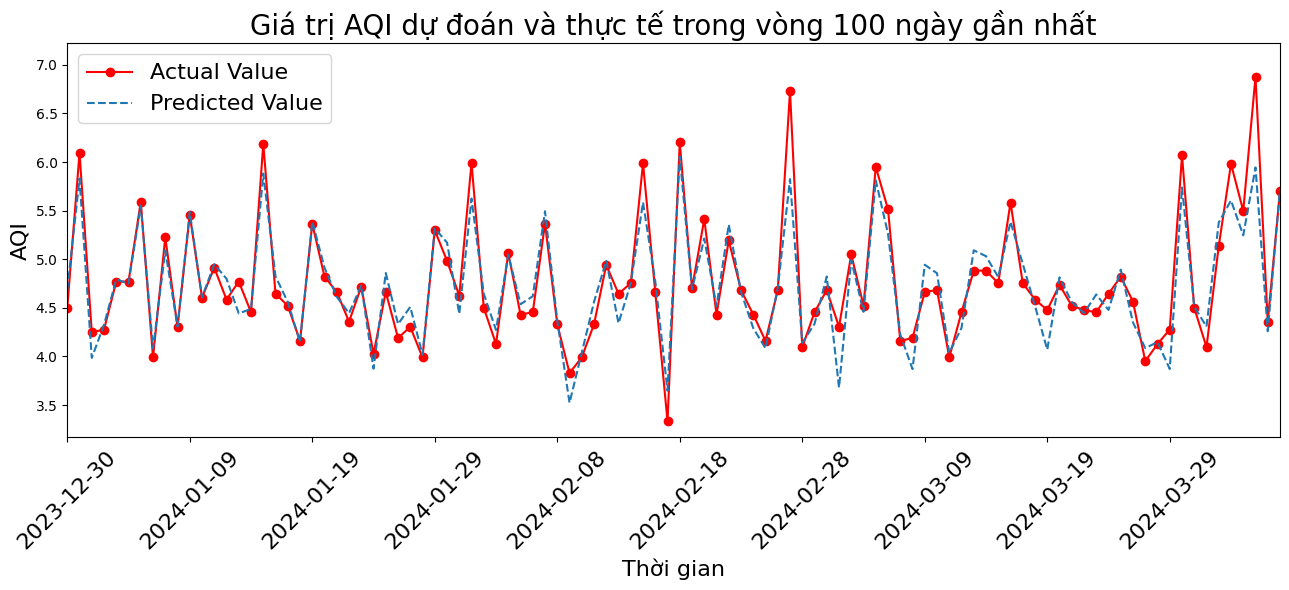

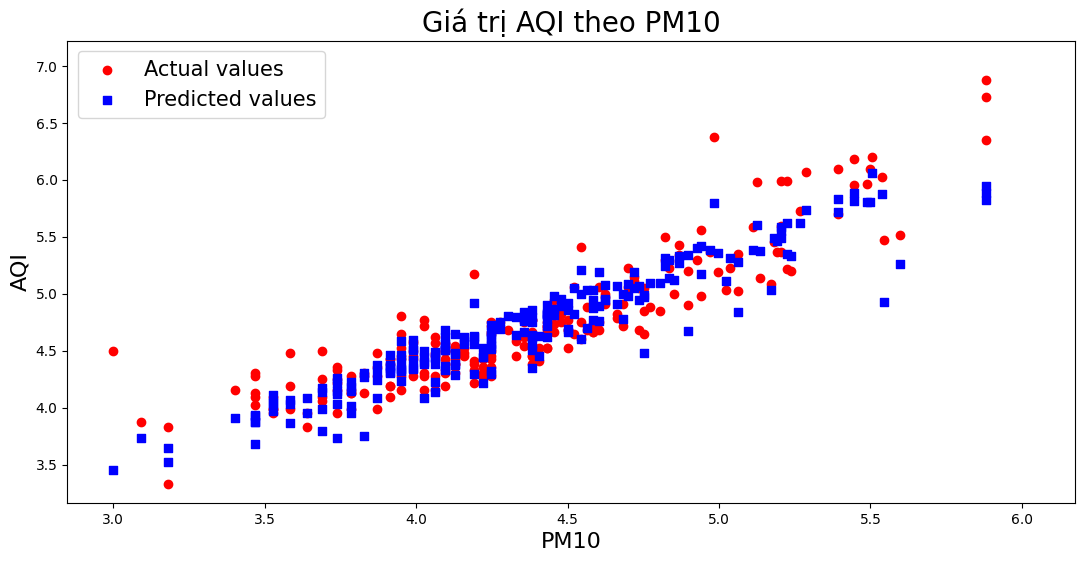

In [19]:
_plot_time_series(y_validation[-100:], y_predict_ridge[-100:], df['Date'][-100:].values, 
                  title='Giá trị AQI dự đoán và thực tế trong vòng 100 ngày gần nhất',  
                  xlabel='Thời gian', 
                  ylabel='AQI')
scatter_plot_act_pred(X_validation['PM10'], y_validation, y_predict_ridge, 
      title='Giá trị AQI theo PM10',  
      xlabel='PM10', 
      ylabel='AQI')

#### 6. Kết luận

##### 6.1 Ưu điểm
<li>Cung cấp một giải pháp ổn định hơn so với Linear Regression thông thường bằng cách giảm thiểu độ lớn của các hệ số, giúp cải thiện độ chính xác và giảm rủi ro overfitting</li>
<li>Duy trì tính linh hoạt để mô hình có thể thích ứng với dữ liệu mới</li>

##### 6.2 Nhược điểm
<li>Độ phức tạp cao hơn so với Linear Regression</li>
<li>Chưa ổn định vì giá trị random_state thay đổi có thể làm biến động hiệu suất mô hình</li>
